<a href="https://colab.research.google.com/github/amitsp21/vc_modeling/blob/master/founders_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from copy import deepcopy

In [ ]:
# !pip install pycrunchbase

# from pycrunchbase import CrunchBase
# cb = CrunchBase('c2b9aa1234609a1441bc64fb25378601')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
os.listdir('/content/gdrive/My Drive/vc_modeling')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['data']

In [ ]:
file_names = os.listdir("/content/gdrive/My Drive/vc_modeling/data/crunchbase_bulk_export/")
print(file_names)

['category_groups.csv', 'funding_rounds.csv', 'people.csv', 'checksum.csv', 'people_descriptions.csv', 'investors.csv', 'organization_descriptions.csv', 'investment_partners.csv', 'event_appearances.csv', 'organizations.csv', 'org_parents.csv', 'jobs.csv', 'acquisitions.csv', 'funds.csv', 'ipos.csv', 'degrees.csv', 'investments.csv', 'events.csv']


In [ ]:
df_names = [x[:-4] for x in file_names]
print(df_names)

['category_groups', 'funding_rounds', 'people', 'checksum', 'people_descriptions', 'investors', 'organization_descriptions', 'investment_partners', 'event_appearances', 'organizations', 'org_parents', 'jobs', 'acquisitions', 'funds', 'ipos', 'degrees', 'investments', 'events']


In [ ]:
dfs = [pd.read_csv("/content/gdrive/My Drive/vc_modeling/data/crunchbase_bulk_export/"+x) for x in file_names]
df_dict = dict(zip(df_names, dfs))
print(df_dict.keys())

dict_keys(['category_groups', 'funding_rounds', 'people', 'checksum', 'people_descriptions', 'investors', 'organization_descriptions', 'investment_partners', 'event_appearances', 'organizations', 'org_parents', 'jobs', 'acquisitions', 'funds', 'ipos', 'degrees', 'investments', 'events'])


## Look at key dfs

In [ ]:
df_dict["people"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040630 entries, 0 to 1040629
Data columns (total 22 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   uuid                            1040630 non-null  object 
 1   name                            1040630 non-null  object 
 2   type                            1040630 non-null  object 
 3   permalink                       1040629 non-null  object 
 4   cb_url                          1040629 non-null  object 
 5   rank                            1036713 non-null  float64
 6   created_at                      1040630 non-null  object 
 7   updated_at                      1040630 non-null  object 
 8   first_name                      1040607 non-null  object 
 9   last_name                       1040608 non-null  object 
 10  gender                          1024070 non-null  object 
 11  country_code                    604144 non-null   object 
 12  

In [ ]:
df_dict["organizations"].info()

In [ ]:
df_dict["degrees"].head()

In [ ]:
df_dict["jobs"].head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,person_uuid,person_name,org_uuid,org_name,started_on,ended_on,is_current,title,job_type
0,697b6934-fc1f-9d63-cfb2-1a10759b378e,Ben Elowitz Co-Founder/CEO/Board of Directors ...,job,ben-elowitz-executive-wetpaint--697b6934,https://www.crunchbase.com/job/ben-elowitz-exe...,NaN,2007-05-25 07:03:54,2018-02-13 01:26:54,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,NaN,NaN,False,Co-Founder/CEO/Board of Directors,executive
1,b1de3765-442e-b556-9304-551c2a055901,Kevin Flaherty VP Marketing @ Wetpaint,job,kevin-flaherty-executive-wetpaint--b1de3765,https://www.crunchbase.com/job/kevin-flaherty-...,NaN,2007-05-25 07:04:16,2018-02-13 01:32:51,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,NaN,NaN,False,VP Marketing,executive
2,1319cd30-f5e8-c700-0af6-64029c6f7124,Raju Vegesna Chief Evangelist @ Zoho,job,raju-vegesna-employee-zoho--1319cd30,https://www.crunchbase.com/job/raju-vegesna-em...,NaN,2007-05-25 19:33:03,2018-02-13 01:19:53,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,2000-11-01,NaN,True,Chief Evangelist,employee
3,27a252de-1ea8-c620-b2d4-5b889fa9b40f,Ian Wenig VP Business Development @ Zoho,job,ian-wenig-executive-zoho--27a252de,https://www.crunchbase.com/job/ian-wenig-execu...,NaN,2007-05-25 19:34:53,2018-02-13 01:21:35,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,2006-03-01,NaN,True,VP Business Development,executive
4,5a802a79-229f-44ae-0aba-db330f10b67a,Jay Adelson CEO @ Digg,job,jay-adelson-executive-digg--5a802a79,https://www.crunchbase.com/job/jay-adelson-exe...,NaN,2007-05-25 20:05:33,2018-02-13 01:25:38,c92a1f00-8c19-bf2e-0f28-dbbd383dc968,Jay Adelson,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,2005-07-01,2010-04-05,False,CEO,executive


## Start poking around a bit with specific companies

In [ ]:
org = df_dict["organizations"]
org[org["name"] == "Snap"].head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,domain,homepage_url,country_code,state_code,region,city,address,postal_code,status,short_description,category_list,category_groups_list,num_funding_rounds,total_funding_usd,total_funding,total_funding_currency_code,founded_on,last_funding_on,closed_on,employee_count,email,phone,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits
206751,e6178a34-5054-6449-8d77-5c28702d0dab,Snap,organization,snapchat,https://www.crunchbase.com/organization/snapchat,10656.0,2014-06-05 23:06:35,2020-07-21 14:47:21,Snap Inc,"investor,company",snap.com,https://www.snap.com,USA,CA,California,Venice,63 Market St,90291,ipo,Snap operates as a privately owned multination...,"Apps,Messaging,Mobile,Photography","Apps,Content and Publishing,Information Techno...",13.0,4.898985e+09,4.898985e+09,USD,2011-05-01,2018-08-07,NaN,1001-5000,NaN,NaN,https://www.facebook.com/snapincorporated/,https://www.linkedin.com/company/snap-inc-co/,https://twitter.com/snap,https://crunchbase-production-res.cloudinary.c...,Snapchat Inc,Snapchat,NaN,company,NaN
401948,79103406-08ed-4aba-7d4b-bd238bf56b26,Snap,organization,snap-3,https://www.crunchbase.com/organization/snap-3,16770.0,2016-06-25 12:02:26,2020-05-18 20:57:15,Snap,company,snap.it,http://snap.it/,USA,CA,California,Santa Monica,NaN,NaN,operating,Snap is a camera and a social media company th...,"Apps,Mobile Apps,Software","Apps,Mobile,Software",1.0,3.259591e+06,3.000000e+06,EUR,2015-01-01,2016-03-01,NaN,11-50,info@snap.it,NaN,NaN,https://www.linkedin.com/company/snap-it/,NaN,https://crunchbase-production-res.cloudinary.c...,NaN,NaN,NaN,company,NaN
517524,f2a2d34a-c21c-eab1-2c34-ac7f381d0954,Snap,organization,sn-ap,https://www.crunchbase.com/organization/sn-ap,11250.0,2017-09-11 08:48:45,2020-06-16 12:09:08,Snap Travel Technology Ltd,company,getasnap.com,https://www.getasnap.com/,GBR,NaN,Waltham Forest,Walthamstow,1-4 Hatherley Mews,E17 4QP,operating,Snap is a technology marketplace that aggregat...,"Leisure,Tourism,Travel","Community and Lifestyle,Travel and Tourism",2.0,7.248334e+06,5.400000e+06,GBP,2016-01-01,2018-05-03,NaN,11-50,helpteam@getasnap.com,020 8088 2475,https://www.facebook.com/SnapTravelTech/,https://www.linkedin.com/company/10999909/,https://twitter.com/SnapTravelTech,https://crunchbase-production-res.cloudinary.c...,NaN,NaN,NaN,company,NaN
1018461,e46f9e8c-17a4-4b93-9d18-3b54e805c71a,Snap,organization,snap-c71a,https://www.crunchbase.com/organization/snap-c71a,867217.0,2020-05-07 05:21:03,2020-05-07 05:21:03,NaN,company,snapbv.nl,http://www.snapbv.nl/,NLD,NaN,Zeeland,Sluis,NaN,NaN,operating,Snap bv is a media and communication agency th...,"Advertising,Brand Marketing,Digital Media","Advertising,Media and Entertainment,Sales and ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,info@snapbv.nl,31117420970,NaN,NaN,NaN,https://crunchbase-production-res.cloudinary.c...,NaN,NaN,NaN,company,NaN
1080718,cfc67bb0-118e-403c-82fa-0249236fbefd,Snap,organization,snap-befd,https://www.crunchbase.com/organization/snap-befd,1056555.0,2020-07-17 01:05:35,2020-07-17 01:05:35,NaN,company,snap.pt,http://www.snap.pt,PRT,NaN,Lisboa,Porto,NaN,NaN,operating,Snap is a creative advertising agency that pro...,"Advertising,Graphic Design,Web Design","Advertising,Design,Sales and Marketing",NaN,NaN,NaN,NaN,2011-09-01,NaN,NaN,1-10,hello@snap.pt,351-224014676,NaN,NaN,NaN,https://crunchbase-production-res.cloudinary.c...,NaN,NaN,NaN,company,NaN


In [ ]:
org_uuid = 'e6178a34-5054-6449-8d77-5c28702d0dab'  # Snap

In [ ]:
# people belonging to a company

df_dict["people"][df_dict["people"]["featured_job_organization_uuid"]==org_uuid].head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,first_name,last_name,gender,country_code,state_code,region,city,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,facebook_url,linkedin_url,twitter_url,logo_url
8592,737134e3-7c0a-ca9a-6cda-13898daed3a5,Michael Lynton,person,michael-lynton,https://www.crunchbase.com/person/michael-lynton,3818.0,2008-05-15 02:35:43,2018-02-12 23:28:49,Michael,Lynton,male,USA,CA,California,Los Angeles,e6178a34-5054-6449-8d77-5c28702d0dab,Snap,Chairman,NaN,http://www.linkedin.com/pub/michael-lynton/11/...,NaN,https://crunchbase-production-res.cloudinary.c...
20272,acf7377c-35e7-98c8-674f-f073e2f223ae,Scott Forstall,person,scott-forstall,https://www.crunchbase.com/person/scott-forstall,8524.0,2008-12-10 07:10:47,2018-02-12 23:35:14,Scott,Forstall,male,USA,NY,New York,New York,e6178a34-5054-6449-8d77-5c28702d0dab,Snap,Advisor,NaN,NaN,http://twitter.com/forstall,https://crunchbase-production-res.cloudinary.c...
80546,e190f759-fd9f-9bfd-874d-576ab43bc0ce,Evan Spiegel,person,evan-spiegel,https://www.crunchbase.com/person/evan-spiegel,132.0,2011-06-28 06:23:43,2019-04-15 18:12:46,Evan,Spiegel,male,USA,CA,California,Venice,e6178a34-5054-6449-8d77-5c28702d0dab,Snap,Co-Founder and CEO,NaN,NaN,http://twitter.com/evanspiegel,https://crunchbase-production-res.cloudinary.c...
80547,dbb9b967-7c5f-1990-745f-60c0c9ae9032,Reggie Brown,person,reggie-brown,https://www.crunchbase.com/person/reggie-brown,1109.0,2011-06-28 06:23:43,2018-02-12 23:43:04,Reggie,Brown,male,USA,CA,California,Venice,e6178a34-5054-6449-8d77-5c28702d0dab,Snap,Co-Founder,NaN,NaN,NaN,https://crunchbase-production-res.cloudinary.c...
80548,8532a0de-a0bf-11e4-114b-06b8a23a65af,Bobby Murphy,person,bobby-murphy,https://www.crunchbase.com/person/bobby-murphy,780.0,2011-06-28 06:23:43,2018-11-28 00:49:37,Bobby,Murphy,male,USA,CA,California,Venice,e6178a34-5054-6449-8d77-5c28702d0dab,Snap,Co-Founder & Chief Technology Officer,NaN,https://www.linkedin.com/in/bobby-murphy-558927b4,http://twitter.com/hellobobby,https://crunchbase-production-res.cloudinary.c...


In [ ]:
# filter jobs for founders

jobs_df = df_dict["jobs"]
jobs_founders = jobs_df[jobs_df.apply(lambda row: row["title"].lower().find("found") > -1 if isinstance(row["title"], str) else False, axis=1)]
org_and_founder_uuid = jobs_founders[["org_uuid", "person_uuid"]]
founders_uuids = jobs_founders.person_uuid.unique()

people_df = df_dict["people"]
org_founders = people_df.loc[people_df["uuid"].isin(founders_uuids)].set_index("uuid")
org_founders.head()

,name,type,permalink,cb_url,rank,created_at,updated_at,first_name,last_name,gender,country_code,state_code,region,city,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,facebook_url,linkedin_url,twitter_url,logo_url
uuid,,,,,,,,,,,,,,,,,,,,,
ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,person,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,20738.0,2007-05-25 14:03:54,2020-02-21 05:19:55,Ben,Elowitz,male,USA,WA,Washington,Seattle,cf253887-5eac-21a2-28d3-47db7311f7e9,Madrona Venture Group,Managing Director,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz/,http://twitter.com/elowitz,https://crunchbase-production-res.cloudinary.c...
80d25c23-9726-9dda-5852-39cdf4810ea5,Ron Gorodetzky,person,ron-gorodetzky,https://www.crunchbase.com/person/ron-gorodetzky,91964.0,2007-05-26 03:07:50,2018-02-12 23:42:44,Ron,Gorodetzky,male,NaN,NaN,NaN,NaN,aa3bf156-06af-5b6e-215d-9e7211fc173b,fflick,Co-Founder and CTO,NaN,https://twitter.com/ronwinbeta,NaN,https://crunchbase-production-res.cloudinary.c...
a01b8d46-d311-3333-7c34-aa3ae9c03f22,Mark Zuckerberg,person,mark-zuckerberg,https://www.crunchbase.com/person/mark-zuckerberg,59.0,2007-05-26 04:51:46,2018-12-13 14:05:34,Mark,Zuckerberg,male,USA,CA,California,Palo Alto,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,Founder & CEO,https://www.facebook.com/zuck,NaN,https://twitter.com/finkd,https://crunchbase-production-res.cloudinary.c...
084aaa07-0795-1fe8-9c46-98bbeb02cd64,Dustin Moskovitz,person,dustin-moskovitz,https://www.crunchbase.com/person/dustin-mosko...,506.0,2007-05-26 05:15:05,2019-06-07 20:29:51,Dustin,Moskovitz,male,USA,CA,California,San Francisco,c2d47d05-9e78-de77-084c-dd5171251ff1,Asana,Co-Founder,http://www.facebook.com/moskov,https://www.linkedin.com/in/dmoskov,http://twitter.com/moskov,https://crunchbase-production-res.cloudinary.c...
d3ae96f0-4442-720f-1ec2-fc28eac94e53,Owen Van Natta,person,owen-van-natta,https://www.crunchbase.com/person/owen-van-natta,2161.0,2007-05-26 05:15:59,2019-08-30 06:14:27,Owen,Van Natta,male,USA,CA,California,San Francisco,e486ad63-e064-ce03-b644-a2ecd9dcc355,415,Founder and Managing Partner,NaN,https://www.linkedin.com/in/owen-van-natta-444a7/,NaN,https://crunchbase-production-res.cloudinary.c...


unknown                 32396
Unknown                   576
Specialist                 58
Computer Engineering       56
Specialization             49
Chartered Accountant       49
AMP                        48
Honors                     46
Law Degree                 46
None                       46
Name: degree_type, dtype: int64
           degree_type  degree_type_ordinal
0                   MS                  2.0
1                   BA                  1.0
2                   MS                  2.0
3                   BS                  1.0
4                   BS                  1.0
5                   BA                  1.0
6  Bachelor of Science                  1.0
7              unknown                 -1.0
8                 M.A.                  2.0
9                 LL.B                  1.0


,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,person_uuid,person_name,institution_uuid,institution_name,degree_type,subject,started_on,completed_on,is_completed,degree_type_ordinal
0,205fdfd1-ecac-aa43-262f-219f11755f67,MS Mass Communication @ Boston University,degree,NaN,NaN,NaN,2008-02-19 17:58:31,2018-02-13 01:40:03,4897dba9-3141-ecc0-2c4b-c9d844e6440f,John Green,1eab62d2-15d9-0db7-930f-2aa77d4688e1,Boston University,MS,Mass Communication,NaN,1992-01-01,True,2.0
1,1a2ac288-eb99-3318-fde5-1517bc168f51,"BA English, French @ Washington University in...",degree,NaN,NaN,NaN,2008-02-19 17:58:31,2018-02-13 01:39:57,4897dba9-3141-ecc0-2c4b-c9d844e6440f,John Green,6ae9957a-8fb4-0ab1-73fa-dd547c4d3da4,Washington University in St. Louis,BA,"English, French",NaN,1990-01-01,True,1.0
2,b978d338-7ccc-7469-5ce7-ef98c34155ad,MS Internet Technology @ University of Greenwich,degree,NaN,NaN,NaN,2008-02-19 23:40:40,2018-02-13 01:43:09,7d187b77-94f7-e6cc-6981-d7468db5968f,Sridhar Gundaiah,b5ea73f6-12a3-576d-ae9b-f4169147f974,University of Greenwich,MS,Internet Technology,NaN,2006-01-01,True,2.0
3,d01cfaad-0ccc-631e-0382-1e507bf6ba04,BS Computer Science @ Northeastern University,degree,NaN,NaN,NaN,2008-02-21 01:31:01,2018-02-13 01:43:33,45e29113-19f9-c828-68d0-42ad2ef04da0,John Furrier,5f84d9fa-78fd-14b0-d335-5ac3561cdc0a,Northeastern University,BS,Computer Science,NaN,1988-01-01,True,1.0
4,16a607f5-8ab3-573e-8d09-57b3e352e1d3,BS Computer Science @ Rochester Institute of ...,degree,NaN,NaN,NaN,2008-02-21 01:31:34,2018-02-13 01:39:53,b3b4ec6b-86fe-dd6e-ec8a-e8e7e999f274,Ian Reardon,1a380593-fb9d-7f7b-ae67-784ce3ff3690,Rochester Institute of Technology,BS,Computer Science,NaN,2002-01-01,True,1.0


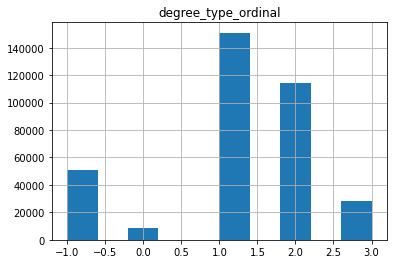

In [ ]:
# map degree_type -> degree_type_ordinal and save as separate column to degrees df

import string

sub_bachelors_types = ["aa", "as", "certificate", "school", "diploma", "dropped out", "degree", "license", "general course", "associates", "aas", "diplom", "high school", "associate"]
bachelors_types = ["ba", "electrical engineering", "ab", "bs", "bfa", "llb", "be", "mbbs", "bsc hons", "college", "engineers degree", "bas", "b sc", "bc", "bca", "bmath", "barch", "bsj", "engineering", "engineer", "bachleor", "bechelors degree", "finance", "scb", "sm", "bdes", "bsba", "bec", "ba hons", "ca", "bgs", "bse", "economics", "business", "b tech", "computer science", "bmus", "bcomm", "jba", "bha", "bit", "bis", "bec", "bsce", "bgs", "bbm", "bmed", "bsee", "b eng", "btech", "beng", "bcom", "sb", "bs engineering", "basc", "bsc", "hba", "barts", "bba", "bsme", "bba", "bbs", "ba first class", "bm", "becon", "baa", "bsfs", "bbus"]
masters_types = ["ms", "ma", "mba", "mha", "msci", "executive program", "cfa", "mms", "mscs", "marketing", "management", "entrepreneurship", "mpa", "mps", "mdiv", "emba", "mtech", "cpa", "executive education", "business administration", "international mba", "dea", "business management", "law", "mcs", "mse", "mm", "meng", "me", "med", "m sc", "mims", "mst", "mid", "mph", "mbamph", "mcom", "pgdm", "mia", "mpp", "msee", "bama", "bsms engineering", "mphil", "mea", "mca", "msc", "ms studies", "mmath", "mfa", "executive mba"]
doctorate_types = ["phd", "jd", "dr", "md", "mdphd", "llm", "do", "scd", "engd", "ph d", "dphil", "residency", "dds", "postdoc", "fellowship"]

def map_degree_type(degree_type):
  if degree_type is None or not isinstance(degree_type, str):
    return None
  type_lower = degree_type.lower()
  type_cleaned = type_lower.translate(str.maketrans('', '', string.punctuation)).strip()
  if (type_cleaned in sub_bachelors_types) or type_cleaned.find("certificat") > -1 or type_cleaned.find("associ") > -1:
    return 0
  if (type_cleaned in bachelors_types) or type_cleaned.find("bachelor") > -1:
    return 1
  if (type_cleaned in masters_types) or type_cleaned.find("master") > -1 or type_lower.find("m.") == 0 or type_cleaned.find("grad") > -1:
    return 2
  if (type_cleaned in doctorate_types) or type_cleaned.find("doctor") > -1:
    return 3
  return -1

df = df_dict["degrees"]
df["degree_type_ordinal"] = df.apply(lambda row: map_degree_type(row["degree_type"]), axis=1)
df.hist(column="degree_type_ordinal")
print((df[df["degree_type_ordinal"] == -1]).degree_type.value_counts()[:10])
print(df[["degree_type", "degree_type_ordinal"]][:10])

df.head()

In [ ]:
# join in degree data for each founder

degrees = df_dict["degrees"]
degrees_group_by_person = degrees.groupby(["person_uuid"]).size().reset_index(name='degree_counts')
org_founders_with_degrees = org_founders.join(degrees.set_index("person_uuid"), lsuffix='_person', rsuffix='_degrees')
founders_df = org_founders_with_degrees[["name_person", "rank_person", "institution_name", "degree_type", "degree_type_ordinal"]]
founders_df.head()

,name_person,rank_person,institution_name,degree_type,degree_type_ordinal
0001b358-dfe2-4e22-b64d-e7d7ad1a3474,Zach Pelka,414615.0,NaN,NaN,NaN
0001c922-1144-401c-ba66-ca42616881d4,Guilherne Weigert,708638.0,UERJ,Medical Residence,-1.0
00026df9-9254-269d-40b1-549e9529550d,Theo Koutroukides,280992.0,University of Cambridge,PhD,3.0
00026df9-9254-269d-40b1-549e9529550d,Theo Koutroukides,280992.0,Imperial College London,BSc,1.0
0002e72c-dc7b-483c-856c-9ad74e1052f1,William De Nicolo,878733.0,NaN,NaN,NaN


In [ ]:
top_colleges = [
  "harvard",
  "stanford",
  "massachusetts institute of technology", "mit",
  "princeton",
  "yale",
  "columbia",
  "california institute of technology", "caltech", "cal-tech",
  "university of pennsylvania", "upenn", "u-penn",
  "university of berkeley", "uc berkeley", "ucberkeley", "berkeley",
  "cornell",
  "duke",
  "university of chicago", "uchicago", "u-chicago",
  "brown",
  "dartmouth",
  "university of california los angeles", "ucla", "uc los angeles"
  "brown",
  "university of michigan", "umich", "u-michigan", "u-mich", "umichigan",
  "dartmouth",
  "georgia institute of technology", "georgia tech",
  "carnegie mellon", "cmu",
  "rice",
  "new york university", "nyu",

  # international
  "oxford",
  "cambridge",
  "indian institute of technology", "iit",
  "tsinghua",
  "swiss federal",
  "imperial college",
  "university college london", "ucl"
]

def is_top_college(school_name):
  if not isinstance(school_name, str):
    return 0
  school_name_cleaned = school_name.lower().strip()
  for tc in top_colleges:
    if school_name_cleaned.find(tc) > -1:
      return 1
  return 0

founders_df["top_college"] = founders_df.apply(lambda row: is_top_college(row["institution_name"]), axis=1)
founders_df.sort_values(by="rank_person")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,name_person,rank_person,institution_name,degree_type,degree_type_ordinal,top_college
3f47be49-2e32-8118-01a0-31685a4d0fd7,Peter Thiel,1.0,Stanford University,JD,3.0,1
3f47be49-2e32-8118-01a0-31685a4d0fd7,Peter Thiel,1.0,Stanford University,BA,1.0,1
a00e381e-64c4-14ac-4834-271ef101e712,Mukesh Ambani,2.0,Stanford University,MBA,2.0,1
a00e381e-64c4-14ac-4834-271ef101e712,Mukesh Ambani,2.0,Institute of Chemical Technology,Bachelor,1.0,0
62ab53b0-3a28-0cb7-9995-fd3215b78e41,Bill Gates,3.0,Harvard University,Graduate,2.0,1
...,...,...,...,...,...,...
fe285c69-dc36-4187-ad7d-29461bfca2e0,Carol Eastman,NaN,NaN,NaN,NaN,0
fe670e42-a6cc-4ee5-9fea-f7b68f2dabf8,Dai Xuefeng,NaN,NaN,NaN,NaN,0
fed67620-841b-4f16-bd2a-1ced57d97e7d,David Baram,NaN,NaN,NaN,NaN,0
ff05dcba-8a5b-4a21-902c-7542d714ef79,Alisha Saha,NaN,NaN,NaN,NaN,0


In [ ]:
any_top_college = founders_df["top_college"].groupby(founders_df.index).max()
max_degree_ordinal = founders_df["degree_type_ordinal"].groupby(founders_df.index).max()
founders_df_base = founders_df.loc[~founders_df.index.duplicated(keep="first")][["name_person", "rank_person"]]
degree_counts_df = degrees_group_by_person.set_index("person_uuid")[["degree_counts"]]

founders_df_final = founders_df_base.join(any_top_college).join(max_degree_ordinal).join(degree_counts_df)
founders_df_final = founders_df_final.rename(columns = {"degree_type_ordinal": "max_degree_type_ordinal", "rank_person" : "cb_rank"}, copy = True, inplace = False)
founders_df_final = founders_df_final.sort_values(by="cb_rank")
founders_df_final.head()

,name_person,cb_rank,top_college,max_degree_type_ordinal,degree_counts
3f47be49-2e32-8118-01a0-31685a4d0fd7,Peter Thiel,1.0,1,3.0,2.0
a00e381e-64c4-14ac-4834-271ef101e712,Mukesh Ambani,2.0,1,2.0,2.0
62ab53b0-3a28-0cb7-9995-fd3215b78e41,Bill Gates,3.0,1,2.0,1.0
3a476a62-d930-8aab-041d-cfe5e45a679a,Spencer Rascoff,4.0,1,1.0,1.0
ebae6782-7040-b515-9c89-36fb0a31e113,Mark Cuban,6.0,0,1.0,1.0


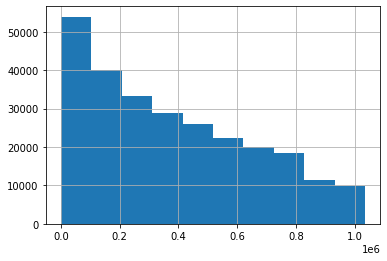

In [ ]:
founders_df_final["cb_rank"].hist()

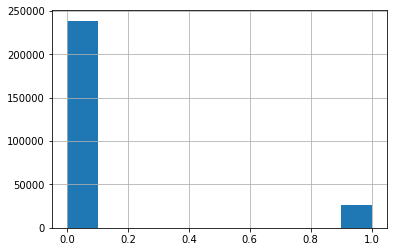

In [ ]:
founders_df_final["top_college"].hist()

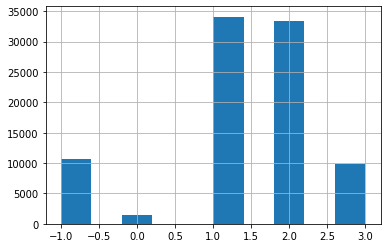

In [ ]:
founders_df_final["max_degree_type_ordinal"].hist()

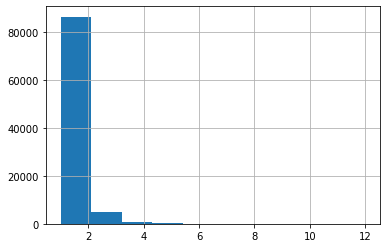

In [ ]:
founders_df_final["degree_counts"].hist()

In [ ]:
org_and_founder_uuid_dedup = org_and_founder_uuid.drop_duplicates()

org_with_founders_df = org_and_founder_uuid_dedup.join(founders_df_final, on="person_uuid")[["org_uuid", "person_uuid", "cb_rank", "top_college", "max_degree_type_ordinal", "degree_counts"]]

org_with_founders_df = org_with_founders_df.groupby(["org_uuid"], as_index=False).max()
org_with_founders_df = org_with_founders_df.rename(columns = {"cb_rank": "founders_max_rank", "top_college" : "founders_top_college", "max_degree_type_ordinal": "founders_max_degree_type_ordinal", "degree_counts": "founders_max_degree_count"}, copy = True, inplace = False)

org_with_founders_counts = org_and_founder_uuid_dedup.groupby(["org_uuid"], as_index=False).size().to_frame(name="founders_count").reset_index()
org_with_founders_df = org_with_founders_df.join(org_with_founders_counts.set_index("org_uuid"), on=["org_uuid"])

org_with_founders_df.head()

,org_uuid,person_uuid,founders_max_rank,founders_top_college,founders_max_degree_type_ordinal,founders_max_degree_count,founders_count
0,000014da-0c46-b9cb-0941-3a93c027b119,c7ca9967-869d-7775-37c4-a2d5c1569c46,438498.0,0,2.0,1.0,4
1,00002470-bff7-6226-5800-0ca1b3787b6f,a956475b-862a-34ee-4df4-a4dd143d8af1,399048.0,1,2.0,2.0,2
2,00007c5c-9260-0dfb-c160-89a416f1a7cc,c59b1e52-965b-86bc-1e69-eecb7db8a2d9,525715.0,0,NaN,NaN,2
3,0000b5c1-07dd-aeb6-2b17-eb3d64e652a6,34a1865c-dee7-d3a4-a2dc-68178777a04a,147007.0,0,2.0,1.0,1
4,0000c0e1-eb00-9281-9a7f-63dfa277e8df,f3432d1e-2d5f-db7f-2dd7-a650da856139,289919.0,0,NaN,NaN,1


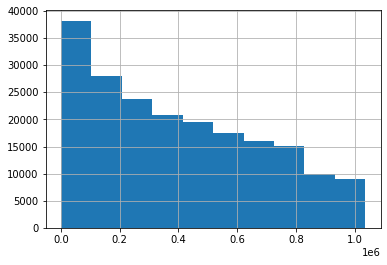

In [ ]:
org_with_founders_df["founders_max_rank"].hist()

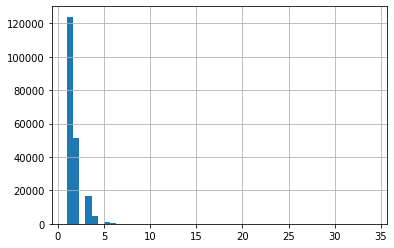

In [ ]:
org_with_founders_df["founders_count"].hist(bins=50)

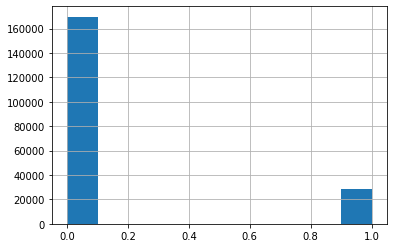

In [ ]:
org_with_founders_df["founders_top_college"].hist()

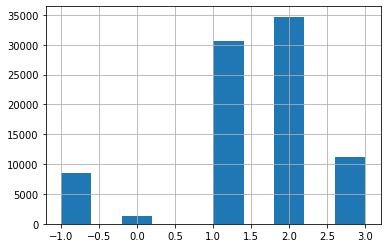

In [ ]:
org_with_founders_df["founders_max_degree_type_ordinal"].hist()

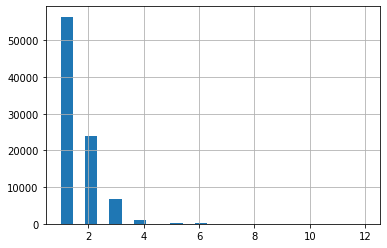

In [ ]:
org_with_founders_df["founders_max_degree_count"].hist(bins=25)